In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
data = pd.read_csv("/kaggle/input/dog-breeds-ranking-best-to-worst/dogs-ranking-dataset.csv")
data.head()#understand the basic format of the data

,Breed,type,score,popularity ranking,size,intelligence,congential ailments,score for kids,size.1,$LIFETIME COST,INTELLIGENCE RANK,INTELLIGENCE %,LONGEVITY(YEARS),NUMBER OF GENETIC AILMENTS,GENETIC AILMENTS,PURCHASE PRICE,FOOD COSTS PER YEAR,GROOMING FREQUNCY,SUITABILITY FOR CHILDREN
0,Border Terrier,terrier,3.61,61,1,Above average,none,4.99,small,"$22,638",30,70%,14.00,0,none,$833,$324,Once a week,1
1,Cairn Terrier,terrier,3.53,48,1,Above average,"'lion jaw', heart problems",4.91,small,"$21,992",35,61%,13.84,2,"'lion jaw', heart problems",$435,$324,Once a week,1
2,Siberian Husky,working,3.22,16,2,Average,none,4.72,medium,"$22,049",45,45%,12.58,0,none,$650,$466,Once in a few weeks,1
3,Welsh Springer Spaniel,sporting,3.34,81,2,Above average,hip problems,4.71,medium,"$20,224",31,69%,12.49,1,hip problems,$750,$324,Once a week,1
4,English Cocker Spaniel,sporting,3.33,51,2,Excellent,none,4.70,medium,"$18,993",18,82%,11.66,0,none,$800,$324,Once a week,1


In [2]:
#mainly using pandas to conduct Data Cleansing
data.info()#first to find out the data information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Breed                       87 non-null     object 
 1   type                        87 non-null     object 
 2   score                       87 non-null     float64
 3   popularity ranking          87 non-null     int64  
 4   size                        87 non-null     int64  
 5   intelligence                87 non-null     object 
 6   congential ailments         87 non-null     object 
 7   score for kids              87 non-null     float64
 8   size.1                      87 non-null     object 
 9   $LIFETIME COST              87 non-null     object 
 10  INTELLIGENCE RANK           87 non-null     int64  
 11  INTELLIGENCE %              87 non-null     object 
 12  LONGEVITY(YEARS)            87 non-null     float64
 13  NUMBER OF GENETIC AILMENTS  87 non-nu

In [3]:
#from the above info, we can see that there is no empty rows
#but we still clear it anyway :)
df = data.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Breed                       87 non-null     object 
 1   type                        87 non-null     object 
 2   score                       87 non-null     float64
 3   popularity ranking          87 non-null     int64  
 4   size                        87 non-null     int64  
 5   intelligence                87 non-null     object 
 6   congential ailments         87 non-null     object 
 7   score for kids              87 non-null     float64
 8   size.1                      87 non-null     object 
 9   $LIFETIME COST              87 non-null     object 
 10  INTELLIGENCE RANK           87 non-null     int64  
 11  INTELLIGENCE %              87 non-null     object 
 12  LONGEVITY(YEARS)            87 non-null     float64
 13  NUMBER OF GENETIC AILMENTS  87 non-nu

In [4]:
#First Task: show the different types of dog
dog_types = df["type"].unique()
print(dog_types)

['terrier' 'working' 'sporting' 'non-sporting' 'herding' 'toy' 'hound']


In [5]:
#Second Task: draw a graph to show which type has the most popularity(according to mean value)
popularity_counts = df.groupby("type")["popularity ranking"].mean()#count the popularity number of each type
print(popularity_counts)

type
herding         43.500000
hound           52.692308
non-sporting    38.600000
sporting        46.066667
terrier         58.416667
toy             36.769231
working         32.285714
Name: popularity ranking, dtype: float64


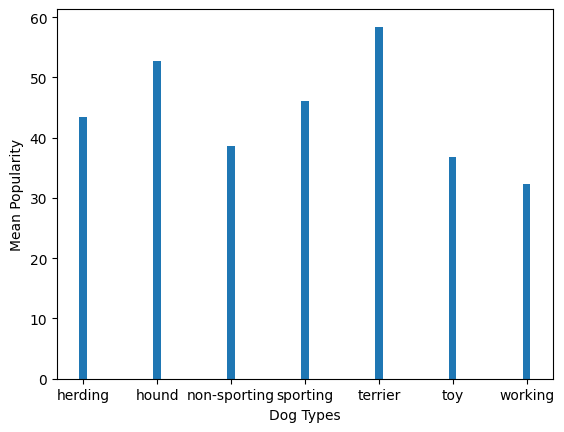

In [6]:
#then start to draw the bar chart
plt.bar(popularity_counts.index, popularity_counts.values,width = 0.1)
plt.xlabel("Dog Types")
plt.ylabel("Mean Popularity")
plt.show()

type
herding         20477.100000
hound           19365.769231
non-sporting    19315.800000
sporting        20809.066667
terrier         20504.333333
toy             19506.076923
working         19124.785714
Name: $LIFETIME COST, dtype: float64


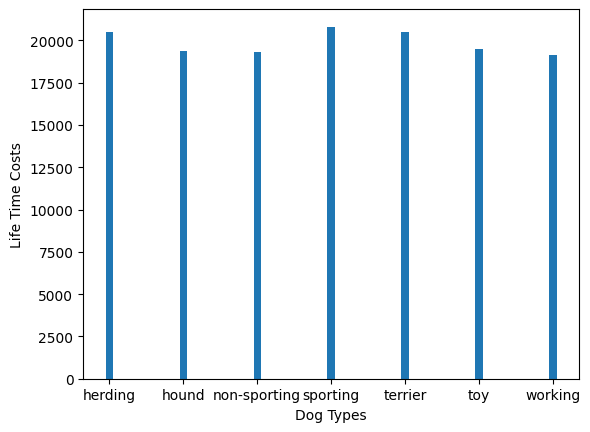

In [7]:
#Task Three: average lifetime cost by dog type
#convert format!!!
df["$LIFETIME COST"] = df["$LIFETIME COST"].astype(str)
df["$LIFETIME COST"] = df["$LIFETIME COST"].str.replace("$","").str.replace(",","").astype(float)
avg_lifetime_cost = df.groupby("type")["$LIFETIME COST"].mean()
print(avg_lifetime_cost)

plt.bar(avg_lifetime_cost.index, avg_lifetime_cost.values, width = 0.1)
plt.xlabel("Dog Types")
plt.ylabel("Life Time Costs")
plt.show()